In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
hd=pd.read_excel("cleveland.xlsx")

In [3]:
hd=hd.drop(hd.index[172], axis=0)

X = hd.iloc[:, :13]

y = hd.iloc[:, 13]
y = y.replace(["negative", "positive"], [0, 1])

In [4]:
std=StandardScaler()
X_std=std.fit_transform(X)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_std)

### 1inci Soru:

#### Kalp Hastalığı Dağılımı

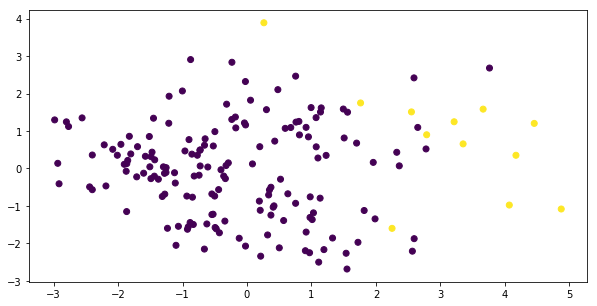

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(X_pca.T[0], X_pca.T[1], c=y)
plt.show()

#### a. Complete Metodu

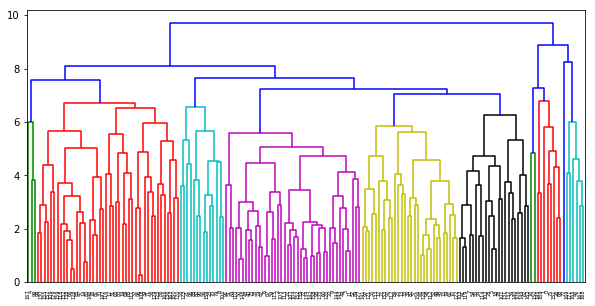

In [8]:
plt.figure(figsize=(10,5))
dendrogram(linkage(X_std, method="complete"))
plt.show()

#### b. Average Metodu

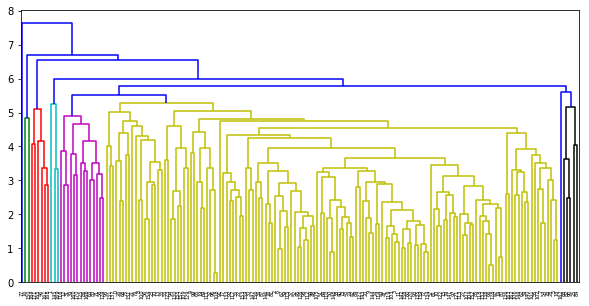

In [51]:
plt.figure(figsize=(10,5))
dendrogram(linkage(X_std, method="average"))
plt.show()

#### c. Ward metodu

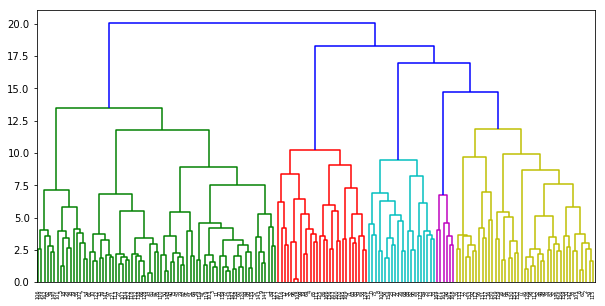

In [12]:
plt.figure(figsize=(10,5))
dendrogram(linkage(X_std, method="ward"))
plt.show()

#### ç. Sonuç

Dendrogramlara bakıldığında, en iyi sonucu 'average" metodu vermiş gibi görünüyor. Ancak, gruplamalardaki değerleri gerçek değerlerle karşılaştırmak gerekiyor. Büyük grubun tamamı aynı gerçek değere sahipse, ancak o zaman diğer metodlara üstünlük sağlayabilmiş demektir.

### 2nci Soru:

K-Ortalama Değerleri:
- ARI: 0.6201351808870379
- Silüet: 0.45994823920518635

#### a. Complete Metodu

In [52]:
agg_clust=AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=3)
clust=agg_clust.fit_predict(X_std)

print("ARI: {}\n"
      .format(metrics.adjusted_rand_score(y, clust)))
print("Silüet: {}"
      .format(metrics.silhouette_score(X_std, clust, metric='euclidean')))

ARI: 0.10369899098620153

Silüet: 0.09030484158440005


#### b. Average Metodu

In [53]:
agg_clust=AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=3)
clust=agg_clust.fit_predict(X_std)

print("ARI: {}\n"
      .format(metrics.adjusted_rand_score(y, clust)))
print("Silüet: {}"
      .format(metrics.silhouette_score(X_std, clust, metric='euclidean')))

ARI: 0.015603674319816628

Silüet: 0.09060270961056655


#### c. Ward Metodu

In [56]:
agg_clust=AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=3)
clust=agg_clust.fit_predict(X_std)

print("ARI: {}\n"
      .format(metrics.adjusted_rand_score(y, clust)))
print("Silüet: {}"
      .format(metrics.silhouette_score(X_std, clust, metric='euclidean')))

ARI: 0.042924229874515864

Silüet: 0.10313472363102977


#### ç. Sonuç

- ARI değerinin yüksek, Sihouette değerinin düşük olması istenmektedir.
- Metodlar arasında en iyisi ARI=0.1 ve Silüet=0.0903 ile 'complete' metodudur.
- ARI değerine göre, tüm metodların performansı K-Means'ten kötüdür.
- Silhouette değerine göre, tüm metodların performansı K-Means'ten iyidir.